# Data Cleaning

In [19]:
import numpy as np
import pandas as pd
import yfinance as yf
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
import statsmodels.tsa.api as smt

# Define the date range
start_date = "2000-01-01"
end_date = "2025-02-01" # Need to have end date later than final data point required

# Download S&P 500 data from Yahoo Finance (Monthly data)
sp500 = yf.download("^GSPC", start=start_date, end=end_date, interval='1mo')[["Close"]]

# Flatten the MultiIndex by selecting the 'Price' level
sp500.columns = [col[0] for col in sp500.columns]

# Rename the column for clarity
sp500.rename(columns={"Close": "S&P500"}, inplace=True)

# Convert index to datetime format
sp500.index = pd.to_datetime(sp500.index)

# Define the date range for FRED data
start_date_dt = datetime.datetime(2000, 1, 1)
end_date_dt = datetime.datetime(2025, 1, 1)

# Download CPI and Unemployment Rate from FRED
cpi = web.DataReader('CPIAUCSL', 'fred', start_date_dt, end_date_dt)
unemployment = web.DataReader('UNRATE', 'fred', start_date_dt, end_date_dt)

# Merge dataframes on Date to ensure same frequency
data = sp500.merge(cpi, left_index=True, right_index=True, how="outer")
data = data.merge(unemployment, left_index=True, right_index=True, how="outer")

# Rename columns for clarity
data.rename(columns={"CPIAUCSL": "CPI", "UNRATE": "UnemploymentRate"}, inplace=True)

# Check for missing values
print(data.isna().sum())

# Display the first few rows
print(data.head())

[*********************100%***********************]  1 of 1 completed

S&P500              0
CPI                 0
UnemploymentRate    0
dtype: int64
                 S&P500    CPI  UnemploymentRate
Date                                            
2000-01-01  1394.459961  169.3               4.0
2000-02-01  1366.420044  170.0               4.1
2000-03-01  1498.579956  171.0               4.0
2000-04-01  1452.430054  170.9               3.8
2000-05-01  1420.599976  171.2               4.0


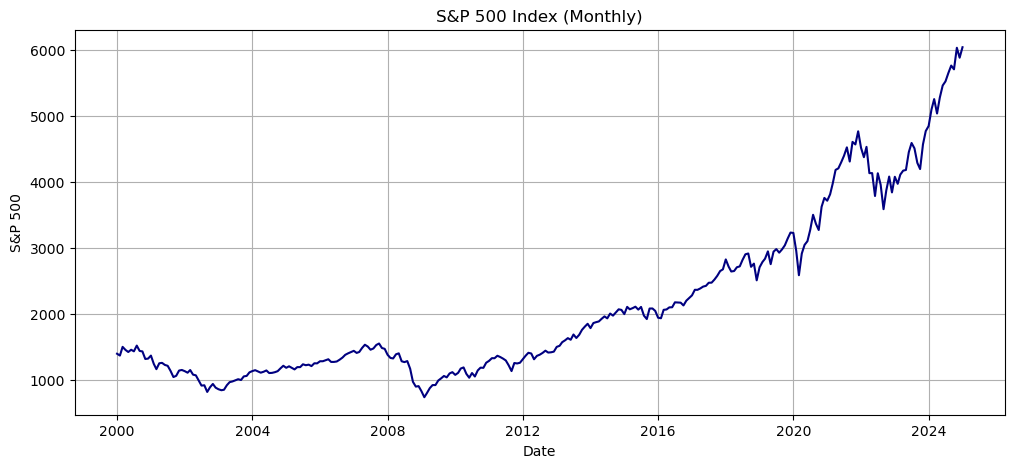

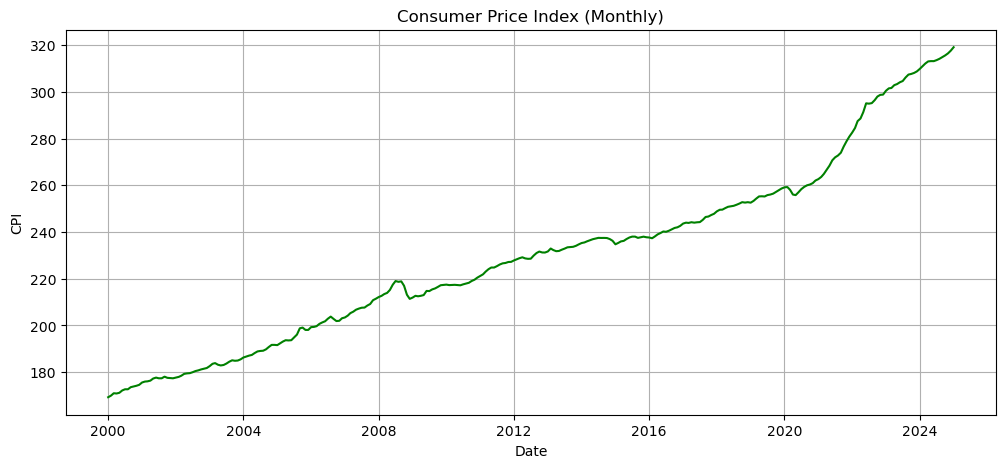

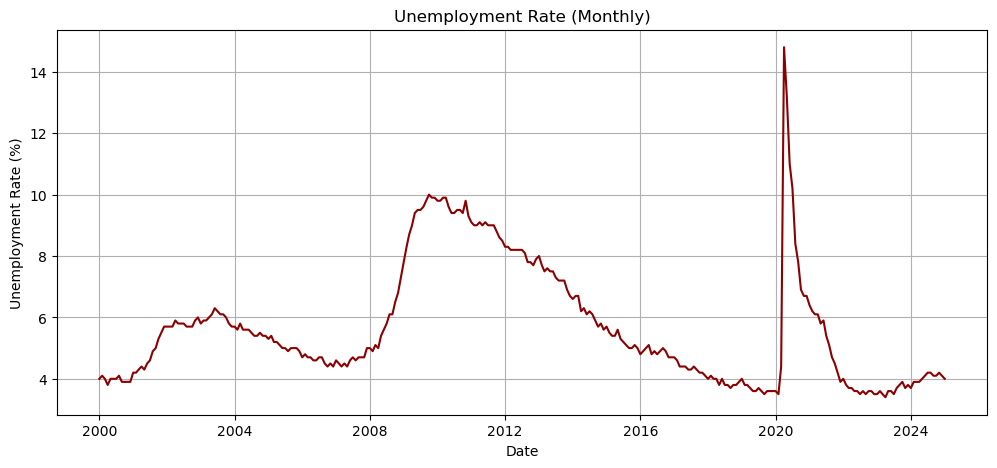

In [20]:
# Plot S&P 500
plt.figure(figsize=(12, 5))
plt.plot(data.index, data['S&P500'], color='navy')
plt.title('S&P 500 Index (Monthly)')
plt.ylabel('S&P 500')
plt.xlabel('Date')
plt.grid(True)
plt.show()

# Plot CPI
plt.figure(figsize=(12, 5))
plt.plot(data.index, data['CPI'], color='green')
plt.title('Consumer Price Index (Monthly)')
plt.ylabel('CPI')
plt.xlabel('Date')
plt.grid(True)
plt.show()

# Plot Unemployment Rate
plt.figure(figsize=(12, 5))
plt.plot(data.index, data['UnemploymentRate'], color='darkred')
plt.title('Unemployment Rate (Monthly)')
plt.ylabel('Unemployment Rate (%)')
plt.xlabel('Date')
plt.grid(True)
plt.show()

In [21]:
from arch.unitroot import ADF
res = ADF(data['S&P500'], lags=10)
print(res.summary())

   Augmented Dickey-Fuller Results   
Test Statistic                  1.937
P-value                         0.999
Lags                               10
-------------------------------------

Trend: Constant
Critical Values: -3.45 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [22]:
res = ADF(data['CPI'], lags=10)
print(res.summary())

   Augmented Dickey-Fuller Results   
Test Statistic                  1.422
P-value                         0.997
Lags                               10
-------------------------------------

Trend: Constant
Critical Values: -3.45 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [23]:
res = ADF(data['UnemploymentRate'], lags=10)
print(res.summary())

   Augmented Dickey-Fuller Results   
Test Statistic                 -2.190
P-value                         0.210
Lags                               10
-------------------------------------

Trend: Constant
Critical Values: -3.45 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [24]:
# Log differences for S&P500
data['dsp'] = np.log(data['S&P500'] / data['S&P500'].shift(1))
data = data.dropna()

In [25]:
# Log differences for CPI
data['dcpi'] = np.log(data['CPI'] / data['CPI'].shift(1))
data = data.dropna()

In [26]:
# First differences for Unemployment Rate
data['dur'] = data['UnemploymentRate'] - data['UnemploymentRate'].shift(1)
data = data.dropna()

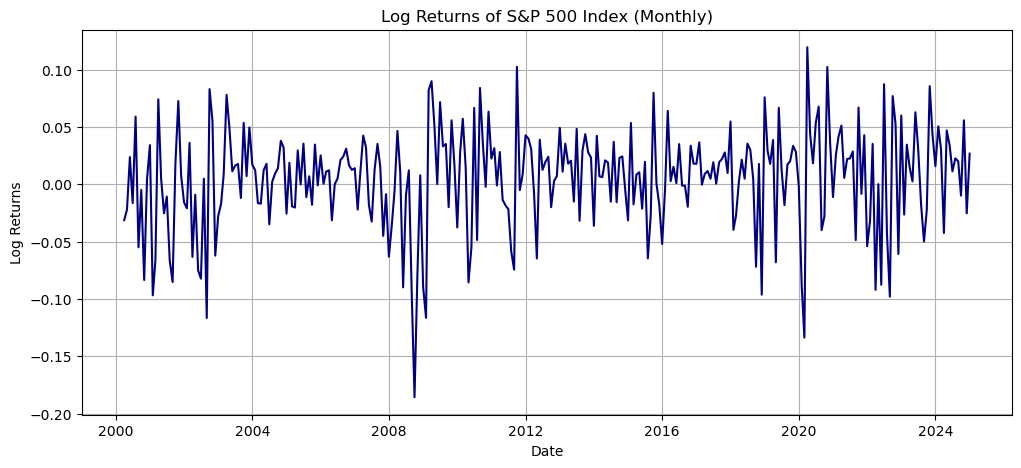

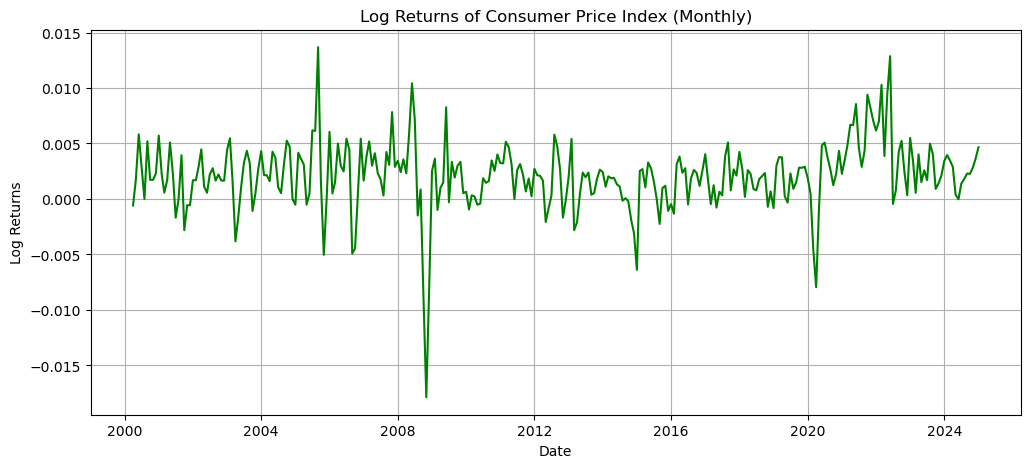

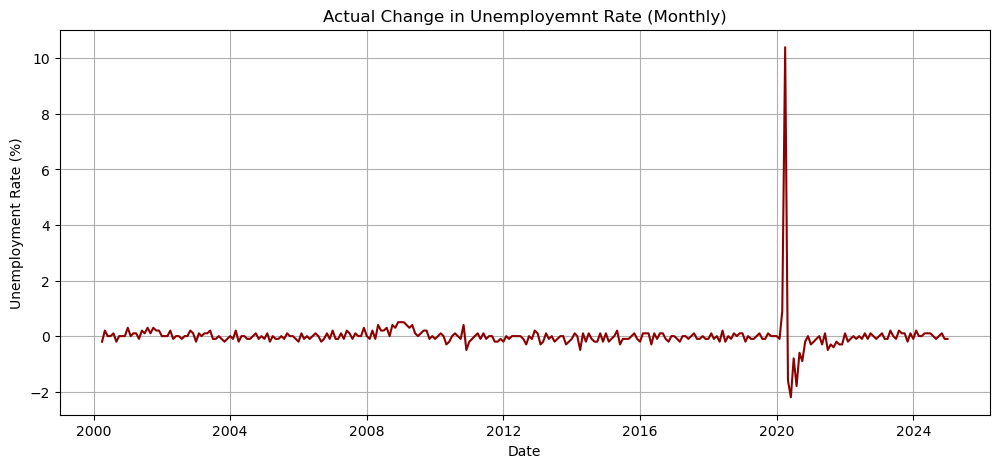

In [27]:
# Plot S&P 500
plt.figure(figsize=(12, 5))
plt.plot(data.index, data['dsp'], color='navy')
plt.title('Log Returns of S&P 500 Index (Monthly)')
plt.ylabel('Log Returns')
plt.xlabel('Date')
plt.grid(True)
plt.show()

# Plot CPI
plt.figure(figsize=(12, 5))
plt.plot(data.index, data['dcpi'], color='green')
plt.title('Log Returns of Consumer Price Index (Monthly)')
plt.ylabel('Log Returns')
plt.xlabel('Date')
plt.grid(True)
plt.show()

# Plot Unemployment Rate
plt.figure(figsize=(12, 5))
plt.plot(data.index, data['dur'], color='darkred')
plt.title('Actual Change in Unemployemnt Rate (Monthly)')
plt.ylabel('Unemployment Rate (%)')
plt.xlabel('Date')
plt.grid(True)
plt.show()

In [28]:
res = ADF(data['dsp'], lags=10)
print(res.summary())

   Augmented Dickey-Fuller Results   
Test Statistic                 -4.942
P-value                         0.000
Lags                               10
-------------------------------------

Trend: Constant
Critical Values: -3.45 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [29]:
res = ADF(data['dcpi'], lags=10)
print(res.summary())

   Augmented Dickey-Fuller Results   
Test Statistic                 -3.782
P-value                         0.003
Lags                               10
-------------------------------------

Trend: Constant
Critical Values: -3.45 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [30]:
res = ADF(data['dur'], lags=10)
print(res.summary())

   Augmented Dickey-Fuller Results   
Test Statistic                 -5.720
P-value                         0.000
Lags                               10
-------------------------------------

Trend: Constant
Critical Values: -3.45 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


# ARMA Modelling

In [31]:
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 298 entries, 2000-04-01 to 2025-01-01
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   S&P500            298 non-null    float64
 1   CPI               298 non-null    float64
 2   UnemploymentRate  298 non-null    float64
 3   dsp               298 non-null    float64
 4   dcpi              298 non-null    float64
 5   dur               298 non-null    float64
dtypes: float64(6)
memory usage: 16.3 KB
None
                 S&P500    CPI  UnemploymentRate       dsp      dcpi  dur
Date                                                                     
2000-04-01  1452.430054  170.9               3.8 -0.031280 -0.000585 -0.2
2000-05-01  1420.599976  171.2               4.0 -0.022159  0.001754  0.2
2000-06-01  1454.599976  172.2               4.0  0.023652  0.005824  0.0
2000-07-01  1430.829956  172.7               4.0 -0.016476  0.002899  0.0
2000-08-01 

In [32]:
#Computing ACF (with Q-statistics and p-values) and PACF for 12 lags
acf_vals_sp, q_stats_sp, p_vals_sp = smt.acf(data['dsp'], nlags=12, qstat=True)
pacf_vals_sp = smt.pacf(data['dsp'], nlags=12)

#Constructing a correlogram DataFrame (excluding lag 0)
correlogram_sp = pd.DataFrame({
    'Lag': range(1, len(acf_vals_sp)),
    'ACF': acf_vals_sp[1:],
    'PACF': pacf_vals_sp[1:],
    'Q-statistic': q_stats_sp,
    'p-value': p_vals_sp
})
print("\nCorrelogram:")
print(correlogram_sp)


Correlogram:
    Lag       ACF      PACF  Q-statistic   p-value
0     1  0.030115  0.030216     0.272986  0.601336
1     2 -0.056823 -0.058173     1.248180  0.535749
2     3  0.089109  0.094005     3.654510  0.301269
3     4  0.068917  0.060942     5.098774  0.277312
4     5  0.035168  0.042848     5.476133  0.360570
5     6 -0.069471 -0.075416     6.953756  0.325145
6     7  0.078518  0.079487     8.847785  0.263770
7     8  0.093997  0.073378    11.571555  0.171368
8     9 -0.102689 -0.097194    14.833592  0.095610
9    10 -0.018116 -0.010264    14.935466  0.134432
10   11  0.033433  0.007186    15.283658  0.169876
11   12  0.038244  0.035527    15.740839  0.203397


In [33]:
#Computing ACF (with Q-statistics and p-values) and PACF for 12 lags
acf_vals_cpi, q_stats_cpi, p_vals_cpi = smt.acf(data['dcpi'], nlags=12, qstat=True)
pacf_vals_cpi = smt.pacf(data['dcpi'], nlags=12)

#Constructing a correlogram DataFrame (excluding lag 0)
correlogram_cpi = pd.DataFrame({
    'Lag': range(1, len(acf_vals_cpi)),
    'ACF': acf_vals_cpi[1:],
    'PACF': pacf_vals_cpi[1:],
    'Q-statistic': q_stats_cpi,
    'p-value': p_vals_cpi
})
print("\nCorrelogram:")
print(correlogram_cpi)


Correlogram:
    Lag       ACF      PACF  Q-statistic       p-value
0     1  0.482091  0.483714    69.958140  6.057641e-17
1     2  0.092471 -0.183916    72.540712  1.770046e-16
2     3  0.046134  0.111135    73.185704  8.869446e-16
3     4  0.109066  0.071409    76.802878  8.279021e-16
4     5  0.061143 -0.045016    77.943545  2.258756e-15
5     6  0.046790  0.063634    78.613827  6.905907e-15
6     7  0.096238  0.069765    81.459194  6.940107e-15
7     8  0.059123 -0.047084    82.536770  1.506621e-14
8     9  0.026514  0.034657    82.754237  4.576604e-14
9    10  0.141602  0.170480    88.978405  8.536937e-15
10   11  0.144025 -0.036794    95.439852  1.421712e-15
11   12 -0.048647 -0.156128    96.179604  3.108240e-15


In [34]:
#Computing ACF (with Q-statistics and p-values) and PACF for 12 lags
acf_vals_ur, q_stats_ur, p_vals_ur = smt.acf(data['dur'], nlags=12, qstat=True)
pacf_vals_ur = smt.pacf(data['dur'], nlags=12)

#Constructing a correlogram DataFrame (excluding lag 0)
correlogram_ur = pd.DataFrame({
    'Lag': range(1, len(acf_vals_ur)),
    'ACF': acf_vals_ur[1:],
    'PACF': pacf_vals_ur[1:],
    'Q-statistic': q_stats_ur,
    'p-value': p_vals_ur
})
print("\nCorrelogram:")
print(correlogram_ur)


Correlogram:
    Lag       ACF      PACF  Q-statistic   p-value
0     1  0.021409  0.021481     0.137962  0.710316
1     2 -0.118678 -0.119997     4.391870  0.111255
2     3 -0.019625 -0.014589     4.508582  0.211526
3     4 -0.105647 -0.122469     7.902519  0.095215
4     5 -0.020245 -0.020452     8.027577  0.154722
5     6 -0.044524 -0.076212     8.634506  0.195200
6     7 -0.008455 -0.016409     8.656467  0.278270
7     8  0.011092 -0.019432     8.694396  0.368729
8     9  0.008998 -0.001213     8.719440  0.463565
9    10  0.000388 -0.016482     8.719487  0.558916
10   11  0.006826  0.002922     8.734001  0.646430
11   12  0.006826  0.000221     8.748565  0.724243


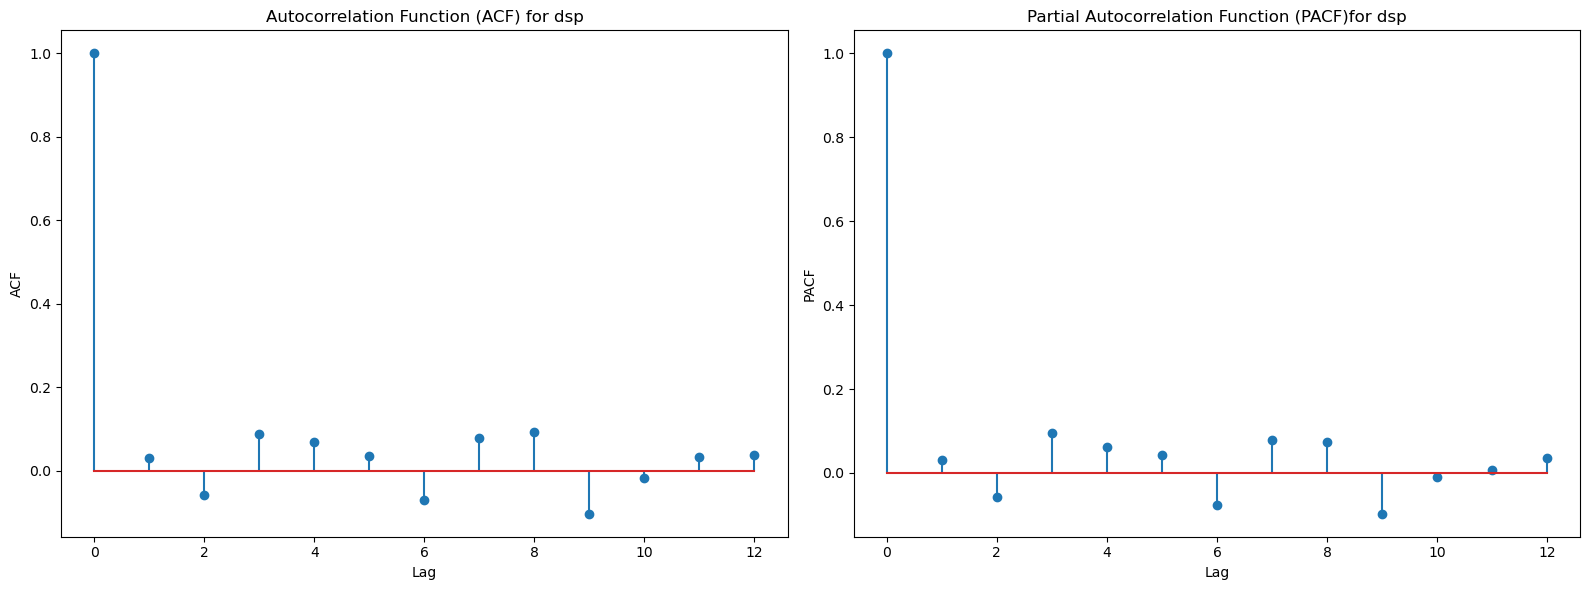

In [35]:
#Plotting ACF and PACF using stem plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.stem(acf_vals_sp)
ax1.set_title('Autocorrelation Function (ACF) for dsp')
ax1.set_xlabel('Lag')
ax1.set_ylabel('ACF')

ax2.stem(pacf_vals_sp)
ax2.set_title('Partial Autocorrelation Function (PACF)for dsp')
ax2.set_xlabel('Lag')
ax2.set_ylabel('PACF')

plt.tight_layout()
plt.show()

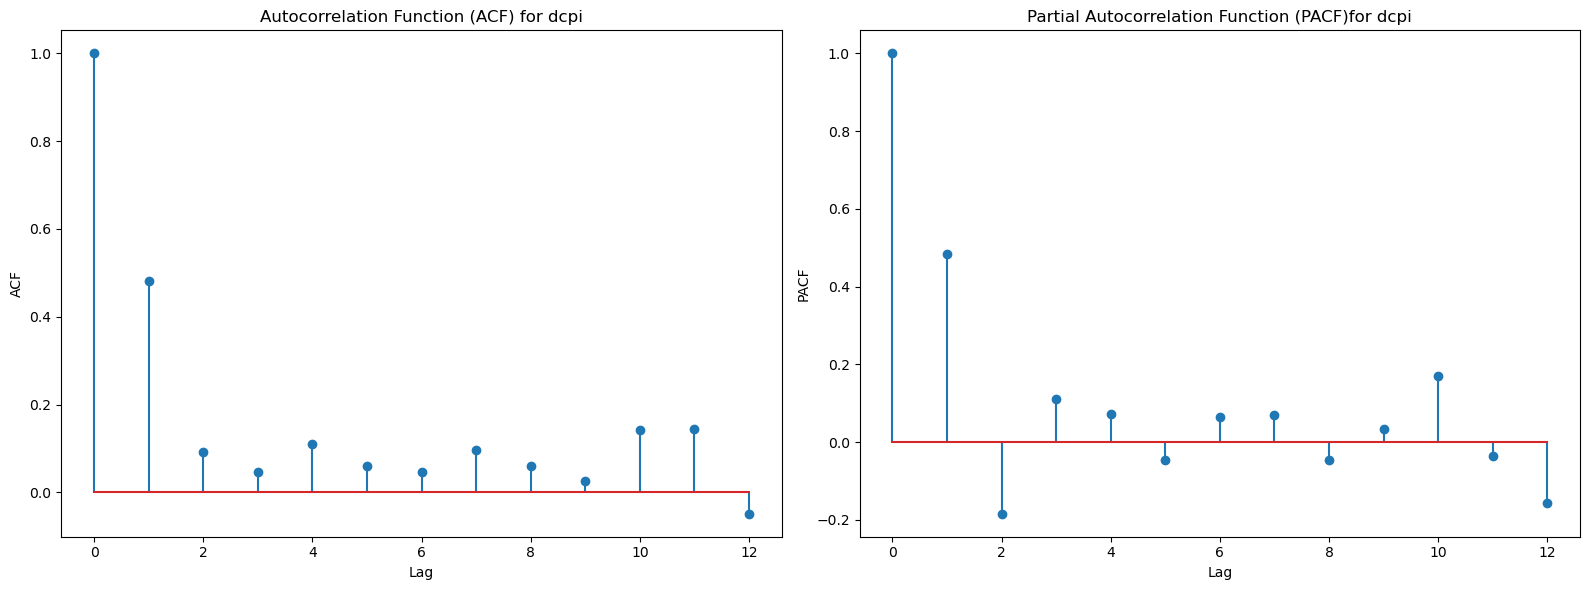

In [36]:
#Plotting ACF and PACF using stem plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.stem(acf_vals_cpi)
ax1.set_title('Autocorrelation Function (ACF) for dcpi')
ax1.set_xlabel('Lag')
ax1.set_ylabel('ACF')

ax2.stem(pacf_vals_cpi)
ax2.set_title('Partial Autocorrelation Function (PACF)for dcpi')
ax2.set_xlabel('Lag')
ax2.set_ylabel('PACF')

plt.tight_layout()
plt.show()

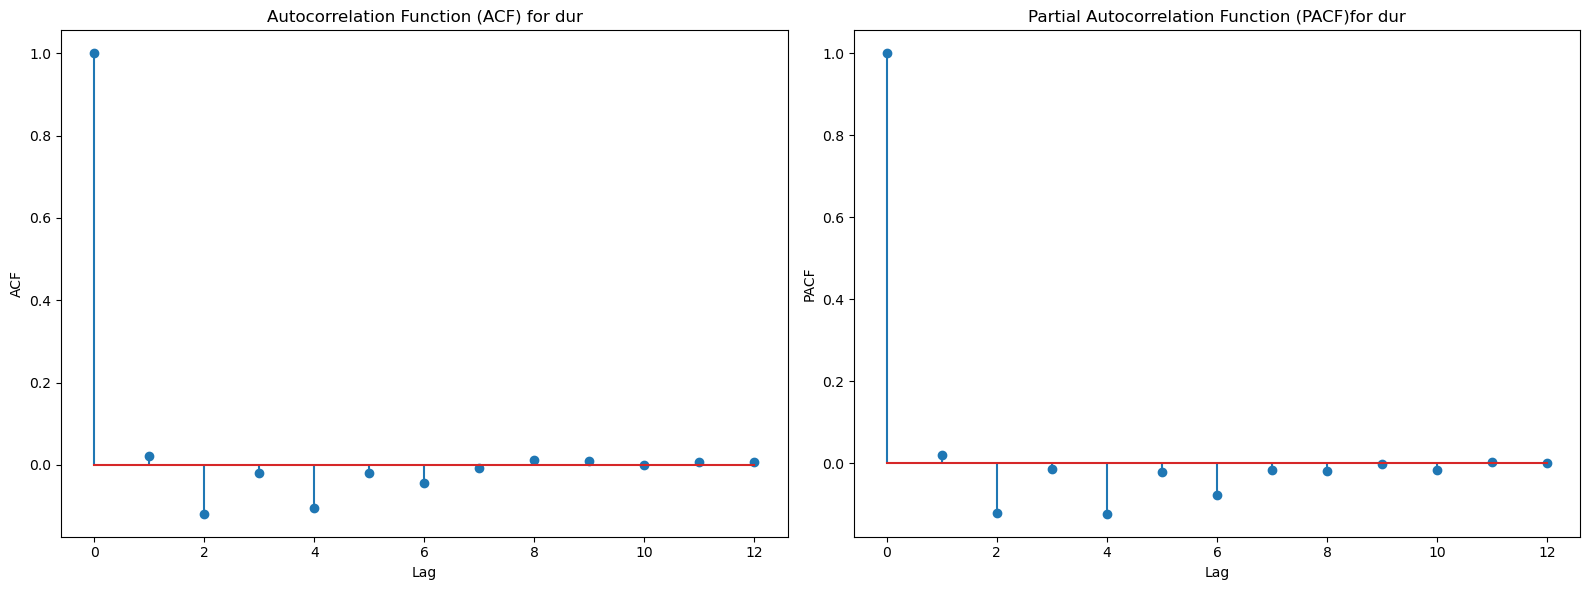

In [37]:
#Plotting ACF and PACF using stem plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.stem(acf_vals_ur)
ax1.set_title('Autocorrelation Function (ACF) for dur')
ax1.set_xlabel('Lag')
ax1.set_ylabel('ACF')

ax2.stem(pacf_vals_ur)
ax2.set_title('Partial Autocorrelation Function (PACF)for dur')
ax2.set_xlabel('Lag')
ax2.set_ylabel('PACF')

plt.tight_layout()
plt.show()

In [38]:
#Evaluating ARMA models up to order (5,5) using AIC and BIC as criteria
ic_results = smt.arma_order_select_ic(data['dsp'], max_ar=5, max_ma=5, ic=['aic', 'bic'], trend='c')
print("\nOptimal order based on AIC:", ic_results.aic_min_order)
print("Optimal order based on BIC:", ic_results.bic_min_order)

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model


Optimal order based on AIC: (0, 0)
Optimal order based on BIC: (0, 0)


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [39]:
#Evaluating ARMA models up to order (5,5) using AIC and BIC as criteria
ic_results = smt.arma_order_select_ic(data['dsp'], max_ar=5, max_ma=5, ic=['aic', 'bic'], trend='c')
print("\nOptimal order based on AIC:", ic_results.aic_min_order)
print("Optimal order based on BIC:", ic_results.bic_min_order)


ic_results = smt.arma_order_select_ic(data['dcpi'], max_ar=5, max_ma=5, ic=['aic', 'bic'], trend='c')
print("\nOptimal order based on AIC:", ic_results.aic_min_order)
print("Optimal order based on BIC:", ic_results.bic_min_order)


ic_results = smt.arma_order_select_ic(data['dur'], max_ar=5, max_ma=5, ic=['aic', 'bic'], trend='c')
print("\nOptimal order based on AIC:", ic_results.aic_min_order)
print("Optimal order based on BIC:", ic_results.bic_min_order)

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model


Optimal order based on AIC: (0, 0)
Optimal order based on BIC: (0, 0)


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximu


Optimal order based on AIC: (0, 2)
Optimal order based on BIC: (0, 2)


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximu


Optimal order based on AIC: (2, 2)
Optimal order based on BIC: (0, 0)


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [40]:
#Estimating an ARMA(0,0) model for dsp
res_sp = smt.ARIMA(data['dsp'], order=(0, 0, 0)).fit()
print("\ndsp ARMA(0,0) Model Summary:")
print(res_sp.summary())


dsp ARMA(0,0) Model Summary:
                               SARIMAX Results                                
Dep. Variable:                    dsp   No. Observations:                  298
Model:                          ARIMA   Log Likelihood                 506.638
Date:                Sat, 03 May 2025   AIC                          -1009.275
Time:                        13:11:27   BIC                          -1001.881
Sample:                    04-01-2000   HQIC                         -1006.316
                         - 01-01-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0047      0.003      1.677      0.094      -0.001       0.010
sigma2         0.0020      0.000     14.094      0.000       0.002       0.002
Ljung-Box (L1) (Q):   

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [41]:
#Estimating an ARMA(0,2) model for dcpi
res_cpi = smt.ARIMA(data['dcpi'], order=(0, 0, 2)).fit()
print("\ndcpi ARMA(0,2) Model Summary:")
print(res_cpi.summary())


dcpi ARMA(0,2) Model Summary:
                               SARIMAX Results                                
Dep. Variable:                   dcpi   No. Observations:                  298
Model:                 ARIMA(0, 0, 2)   Log Likelihood                1348.316
Date:                Sat, 03 May 2025   AIC                          -2688.631
Time:                        13:11:27   BIC                          -2673.843
Sample:                    04-01-2000   HQIC                         -2682.712
                         - 01-01-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0021      0.000      7.558      0.000       0.002       0.003
ma.L1          0.5903      0.037     15.826      0.000       0.517       0.663
ma.L2          0.1240

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [42]:
#Estimating an ARMA(0,0) model for dur
res_ur = smt.ARIMA(data['dur'], order=(0, 0, 0)).fit()
print("\ndur ARMA(0,0) Model Summary:")
print(res_ur.summary())

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)



dur ARMA(0,0) Model Summary:
                               SARIMAX Results                                
Dep. Variable:                    dur   No. Observations:                  298
Model:                          ARIMA   Log Likelihood                -297.996
Date:                Sat, 03 May 2025   AIC                            599.993
Time:                        13:11:27   BIC                            607.387
Sample:                    04-01-2000   HQIC                           602.953
                         - 01-01-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.993e-06      0.087  -5.74e-05      1.000      -0.171       0.171
sigma2         0.4326      0.008     54.685      0.000       0.417       0.448
Ljung-Box (L1) (Q):   

In [43]:
#Check if the estimated model has stationary AR and invertible MA components
arma_process_sp = smt.ArmaProcess.from_estimation(res_sp)

print("\nStationarity and Invertibility Checks:")
print("Is the AR part stationary?", arma_process_sp.isstationary)
print("Is the MA part invertible?", arma_process_sp.isinvertible)


Stationarity and Invertibility Checks:
Is the AR part stationary? True
Is the MA part invertible? True


In [44]:
#Check if the estimated model has stationary AR and invertible MA components
arma_process_cpi = smt.ArmaProcess.from_estimation(res_cpi)

print("\nStationarity and Invertibility Checks:")
print("Is the AR part stationary?", arma_process_cpi.isstationary)
print("Is the MA part invertible?", arma_process_cpi.isinvertible)


Stationarity and Invertibility Checks:
Is the AR part stationary? True
Is the MA part invertible? True


In [45]:
#Check if the estimated model has stationary AR and invertible MA components
arma_process_ur = smt.ArmaProcess.from_estimation(res_ur)

print("\nStationarity and Invertibility Checks:")
print("Is the AR part stationary?", arma_process_ur.isstationary)
print("Is the MA part invertible?", arma_process_ur.isinvertible)


Stationarity and Invertibility Checks:
Is the AR part stationary? True
Is the MA part invertible? True


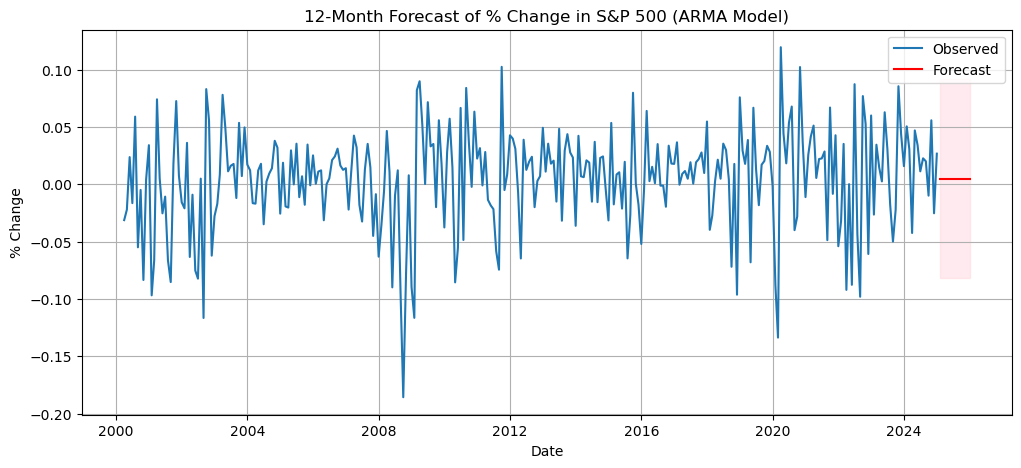

In [46]:
#Forecast 12 months ahead
forecast_sp = res_sp.get_forecast(steps=12)
forecast_sp_mean = forecast_sp.predicted_mean
forecast_sp_ci = forecast_sp.conf_int()

#Plot forecast with confidence intervals
plt.figure(figsize=(12, 5))
plt.plot(data['dsp'], label='Observed')
plt.plot(forecast_sp_mean.index, forecast_sp_mean, label='Forecast', color='red')
plt.fill_between(forecast_sp_ci.index,
                 forecast_sp_ci.iloc[:, 0],
                 forecast_sp_ci.iloc[:, 1],
                 color='pink', alpha=0.3)
plt.title('12-Month Forecast of % Change in S&P 500 (ARMA Model)')
plt.xlabel('Date')
plt.ylabel('% Change')
plt.legend()
plt.grid(True)
plt.show()

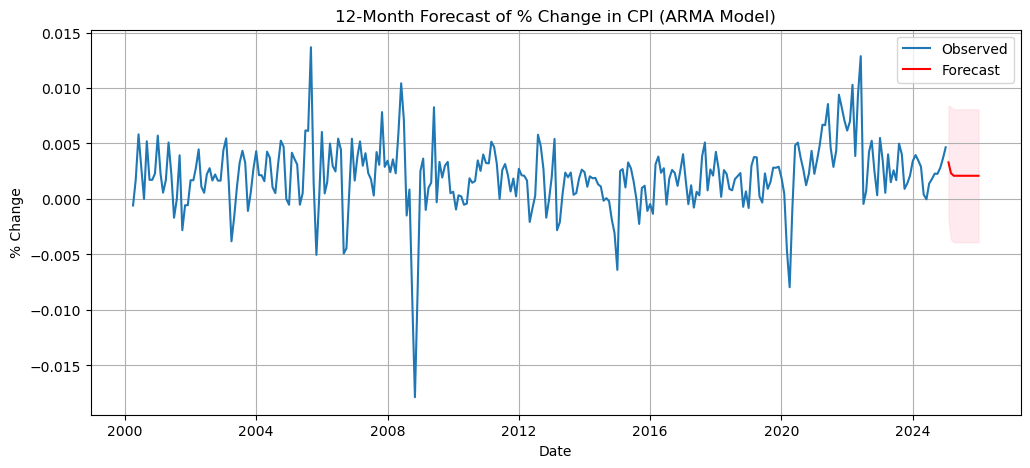

In [47]:
#Forecast 12 months ahead (CPI)
forecast_cpi = res_cpi.get_forecast(steps=12)
forecast_cpi_mean = forecast_cpi.predicted_mean
forecast_cpi_ci = forecast_cpi.conf_int()

#Plot forecast with confidence intervals
plt.figure(figsize=(12, 5))
plt.plot(data['dcpi'], label='Observed')
plt.plot(forecast_cpi_mean.index, forecast_cpi_mean, label='Forecast', color='red')
plt.fill_between(forecast_cpi_ci.index,
                 forecast_cpi_ci.iloc[:, 0],
                 forecast_cpi_ci.iloc[:, 1],
                 color='pink', alpha=0.3)
plt.title('12-Month Forecast of % Change in CPI (ARMA Model)')
plt.xlabel('Date')
plt.ylabel('% Change')
plt.legend()
plt.grid(True)
plt.show()

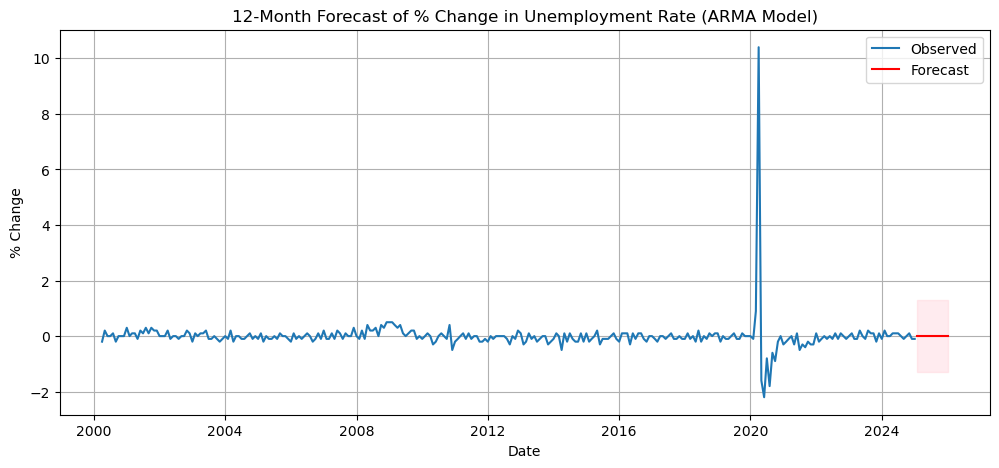

In [48]:
#Forecast 12 months ahead
forecast_ur = res_ur.get_forecast(steps=12)
forecast_ur_mean = forecast_ur.predicted_mean
forecast_ur_ci = forecast_ur.conf_int()

#Plot forecast with confidence intervals
plt.figure(figsize=(12, 5))
plt.plot(data['dur'], label='Observed')
plt.plot(forecast_ur_mean.index, forecast_ur_mean, label='Forecast', color='red')
plt.fill_between(forecast_ur_ci.index,
                 forecast_ur_ci.iloc[:, 0],
                 forecast_ur_ci.iloc[:, 1],
                 color='pink', alpha=0.3)
plt.title('12-Month Forecast of % Change in Unemployment Rate (ARMA Model)')
plt.xlabel('Date')
plt.ylabel('% Change')
plt.legend()
plt.grid(True)
plt.show()

# VAR & Granger Causality

In [51]:
data

,S&P500,CPI,UnemploymentRate,dsp,dcpi,dur
Date,,,,,,
2000-04-01,1452.430054,170.900,3.8,-0.031280,-0.000585,-0.2
2000-05-01,1420.599976,171.200,4.0,-0.022159,0.001754,0.2
2000-06-01,1454.599976,172.200,4.0,0.023652,0.005824,0.0
2000-07-01,1430.829956,172.700,4.0,-0.016476,0.002899,0.0
2000-08-01,1517.680054,172.700,4.1,0.058928,0.000000,0.1
...,...,...,...,...,...,...
2024-09-01,5762.479980,314.851,4.1,0.019996,0.002289,-0.1
2024-10-01,5705.450195,315.564,4.1,-0.009946,0.002262,0.0
2024-11-01,6032.379883,316.449,4.2,0.055720,0.002801,0.1


In [52]:
from statsmodels.tsa.api import VAR

#Constructing continuously compounded percentage returns for each variable
data_transformed = data[['dsp', 'dcpi', 'dur']]

#Setting the frequency explicitly.
data_transformed.index.freq = 'MS'

#VAR Estimation with maxlags=2 
model = VAR(data_transformed)
res = model.fit(maxlags=2)
print("VAR(2) Model Summary:")
print(res.summary())

#Determine the optimal lag length using a multivariate information criterion (maxlags=10)
order_selection = model.select_order(maxlags=10)
print("Lag Order Selection:")
print(order_selection.summary())

VAR(2) Model Summary:
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 03, May, 2025
Time:                     13:12:26
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -18.7586
Nobs:                     296.000    HQIC:                  -18.9156
Log likelihood:           1576.01    FPE:                5.48959e-09
AIC:                     -19.0204    Det(Omega_mle):     5.11785e-09
--------------------------------------------------------------------
Results for equation dsp
             coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------
const           0.004656         0.003376            1.379           0.168
L1.dsp          0.032930         0.058946            0.559           0.576
L1.dcpi        -0.651090         1.012418           -0.643      

In [53]:
#Running pairwise Granger causality tests for all combinations among our three variables
print("\nPairwise Granger Causality Tests:")
variables = data_transformed.columns.tolist()
for caused in variables:
    for causing in variables:
        if caused != causing:
            gc_test = res.test_causality(caused=[caused], causing=[causing], kind='wald', signif=0.05)
            print(f"Equation {caused}, Excluded {causing}")
            print(gc_test.summary())


Pairwise Granger Causality Tests:
Equation dsp, Excluded dcpi
Granger causality Wald-test. H_0: dcpi does not Granger-cause dsp. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
        0.7419          5.991   0.690  2
----------------------------------------
Equation dsp, Excluded dur
Granger causality Wald-test. H_0: dur does not Granger-cause dsp. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
       0.06228          5.991   0.969  2
----------------------------------------
Equation dcpi, Excluded dsp
Granger causality Wald-test. H_0: dsp does not Granger-cause dcpi. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
         19.39          5.991   0.000  2
----------------------------------------
Equation dcpi, Excluded dur

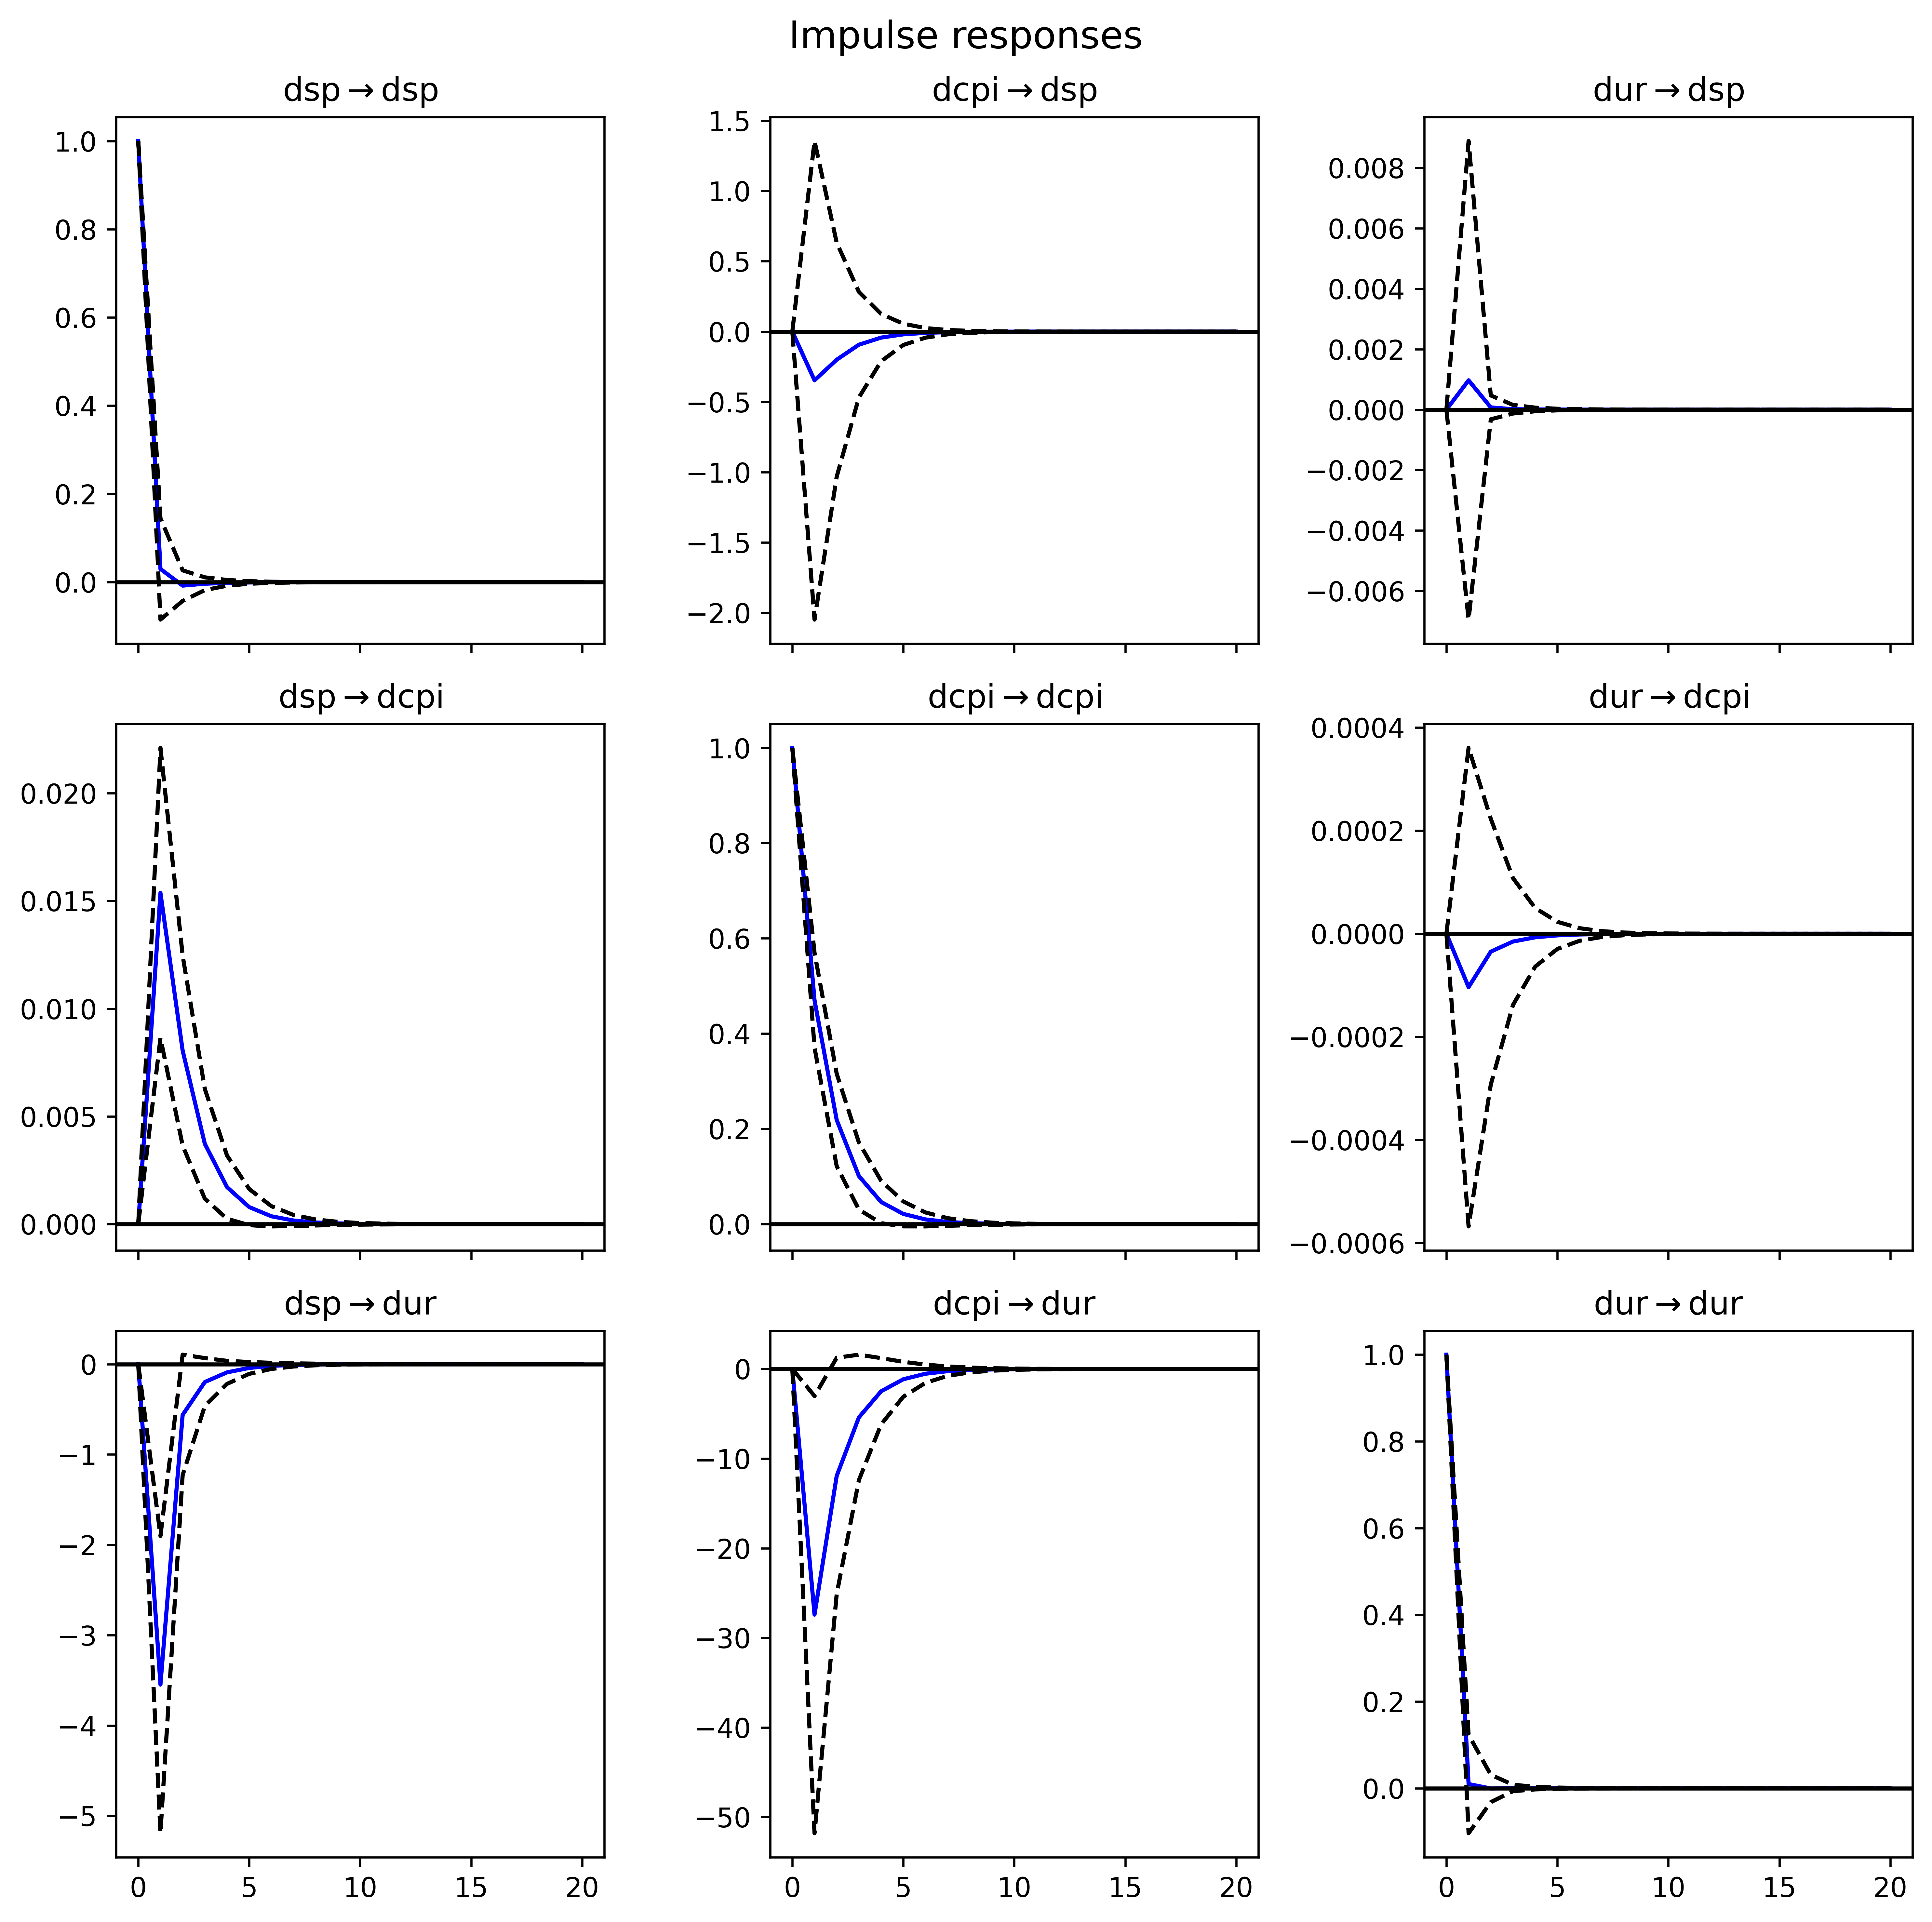

In [54]:
#VAR for IRF and FEVD with maxlags=1 (original ordering)
model_irf = VAR(data_transformed)
res_irf = model_irf.fit(maxlags=1)

#Impulse Response Function for 20 periods
irf = res_irf.irf(20)
fig_irf = irf.plot()
fig_irf.set_dpi(600)
plt.tight_layout()
plt.show()

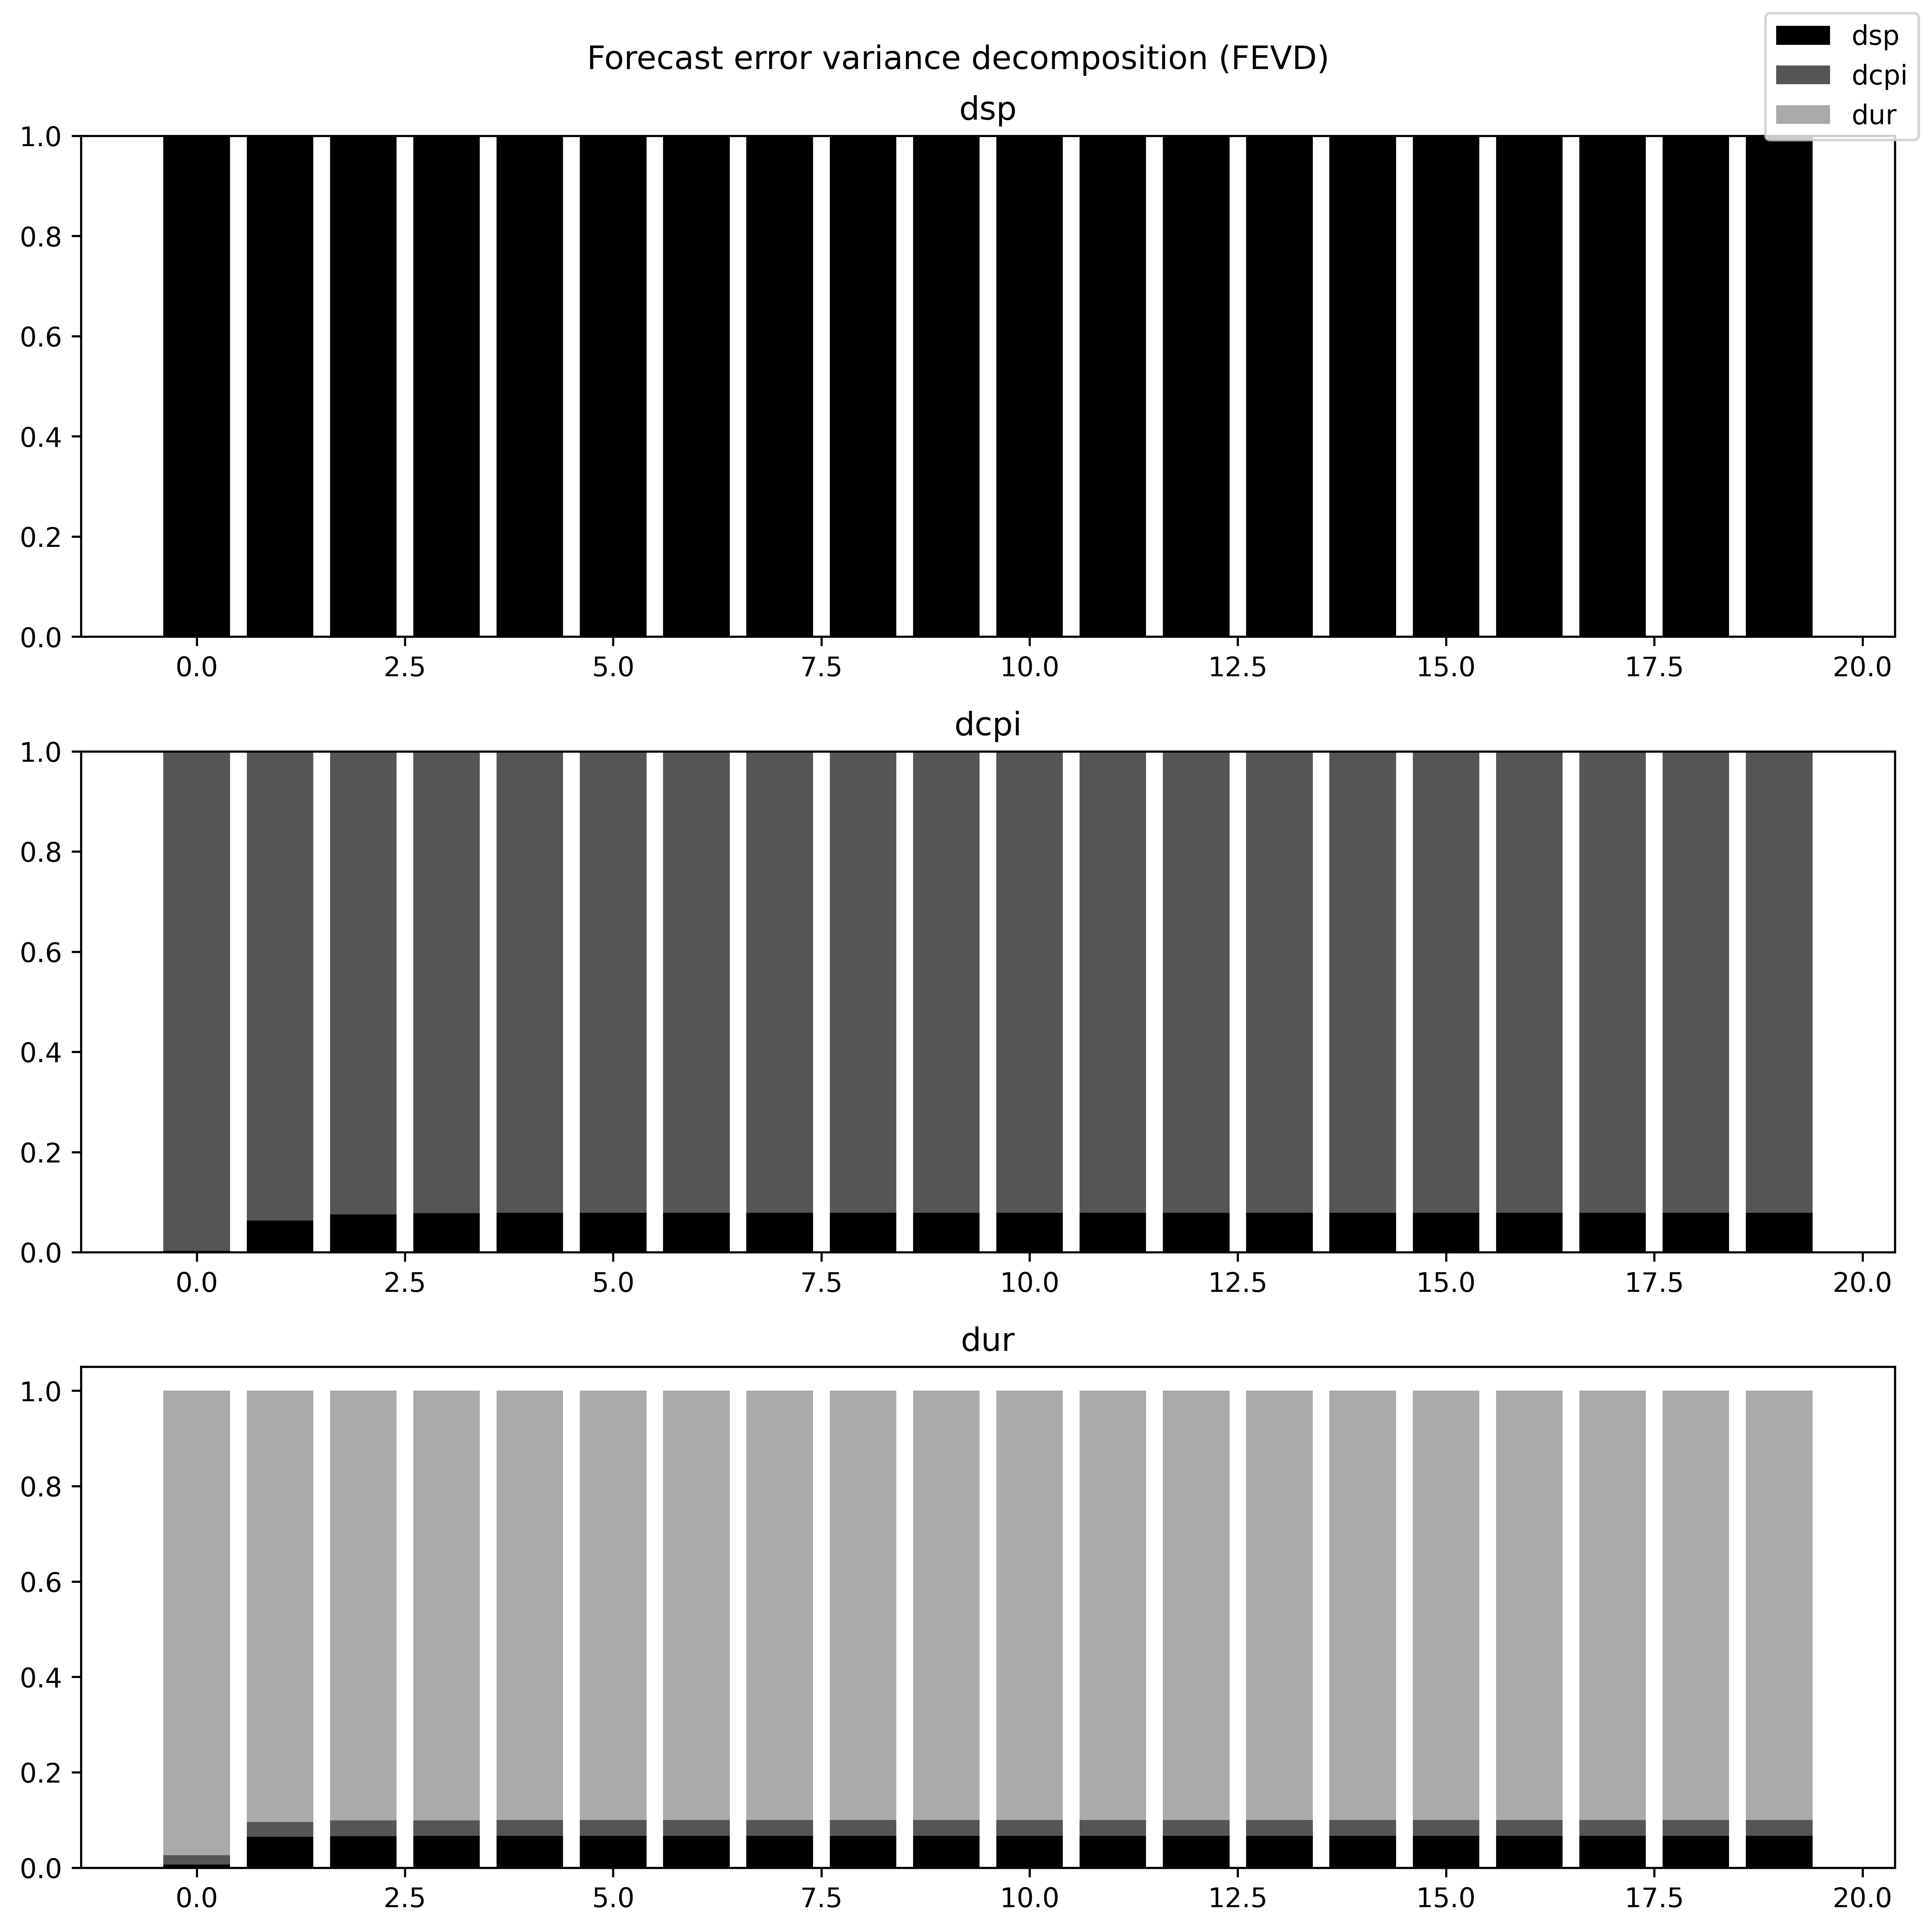

In [55]:
#Forecasting Error Variance Decomposition for 20 periods
fevd = res_irf.fevd(20)
fig_fevd = fevd.plot()
fig_fevd.set_dpi(600)
plt.tight_layout()
plt.show()

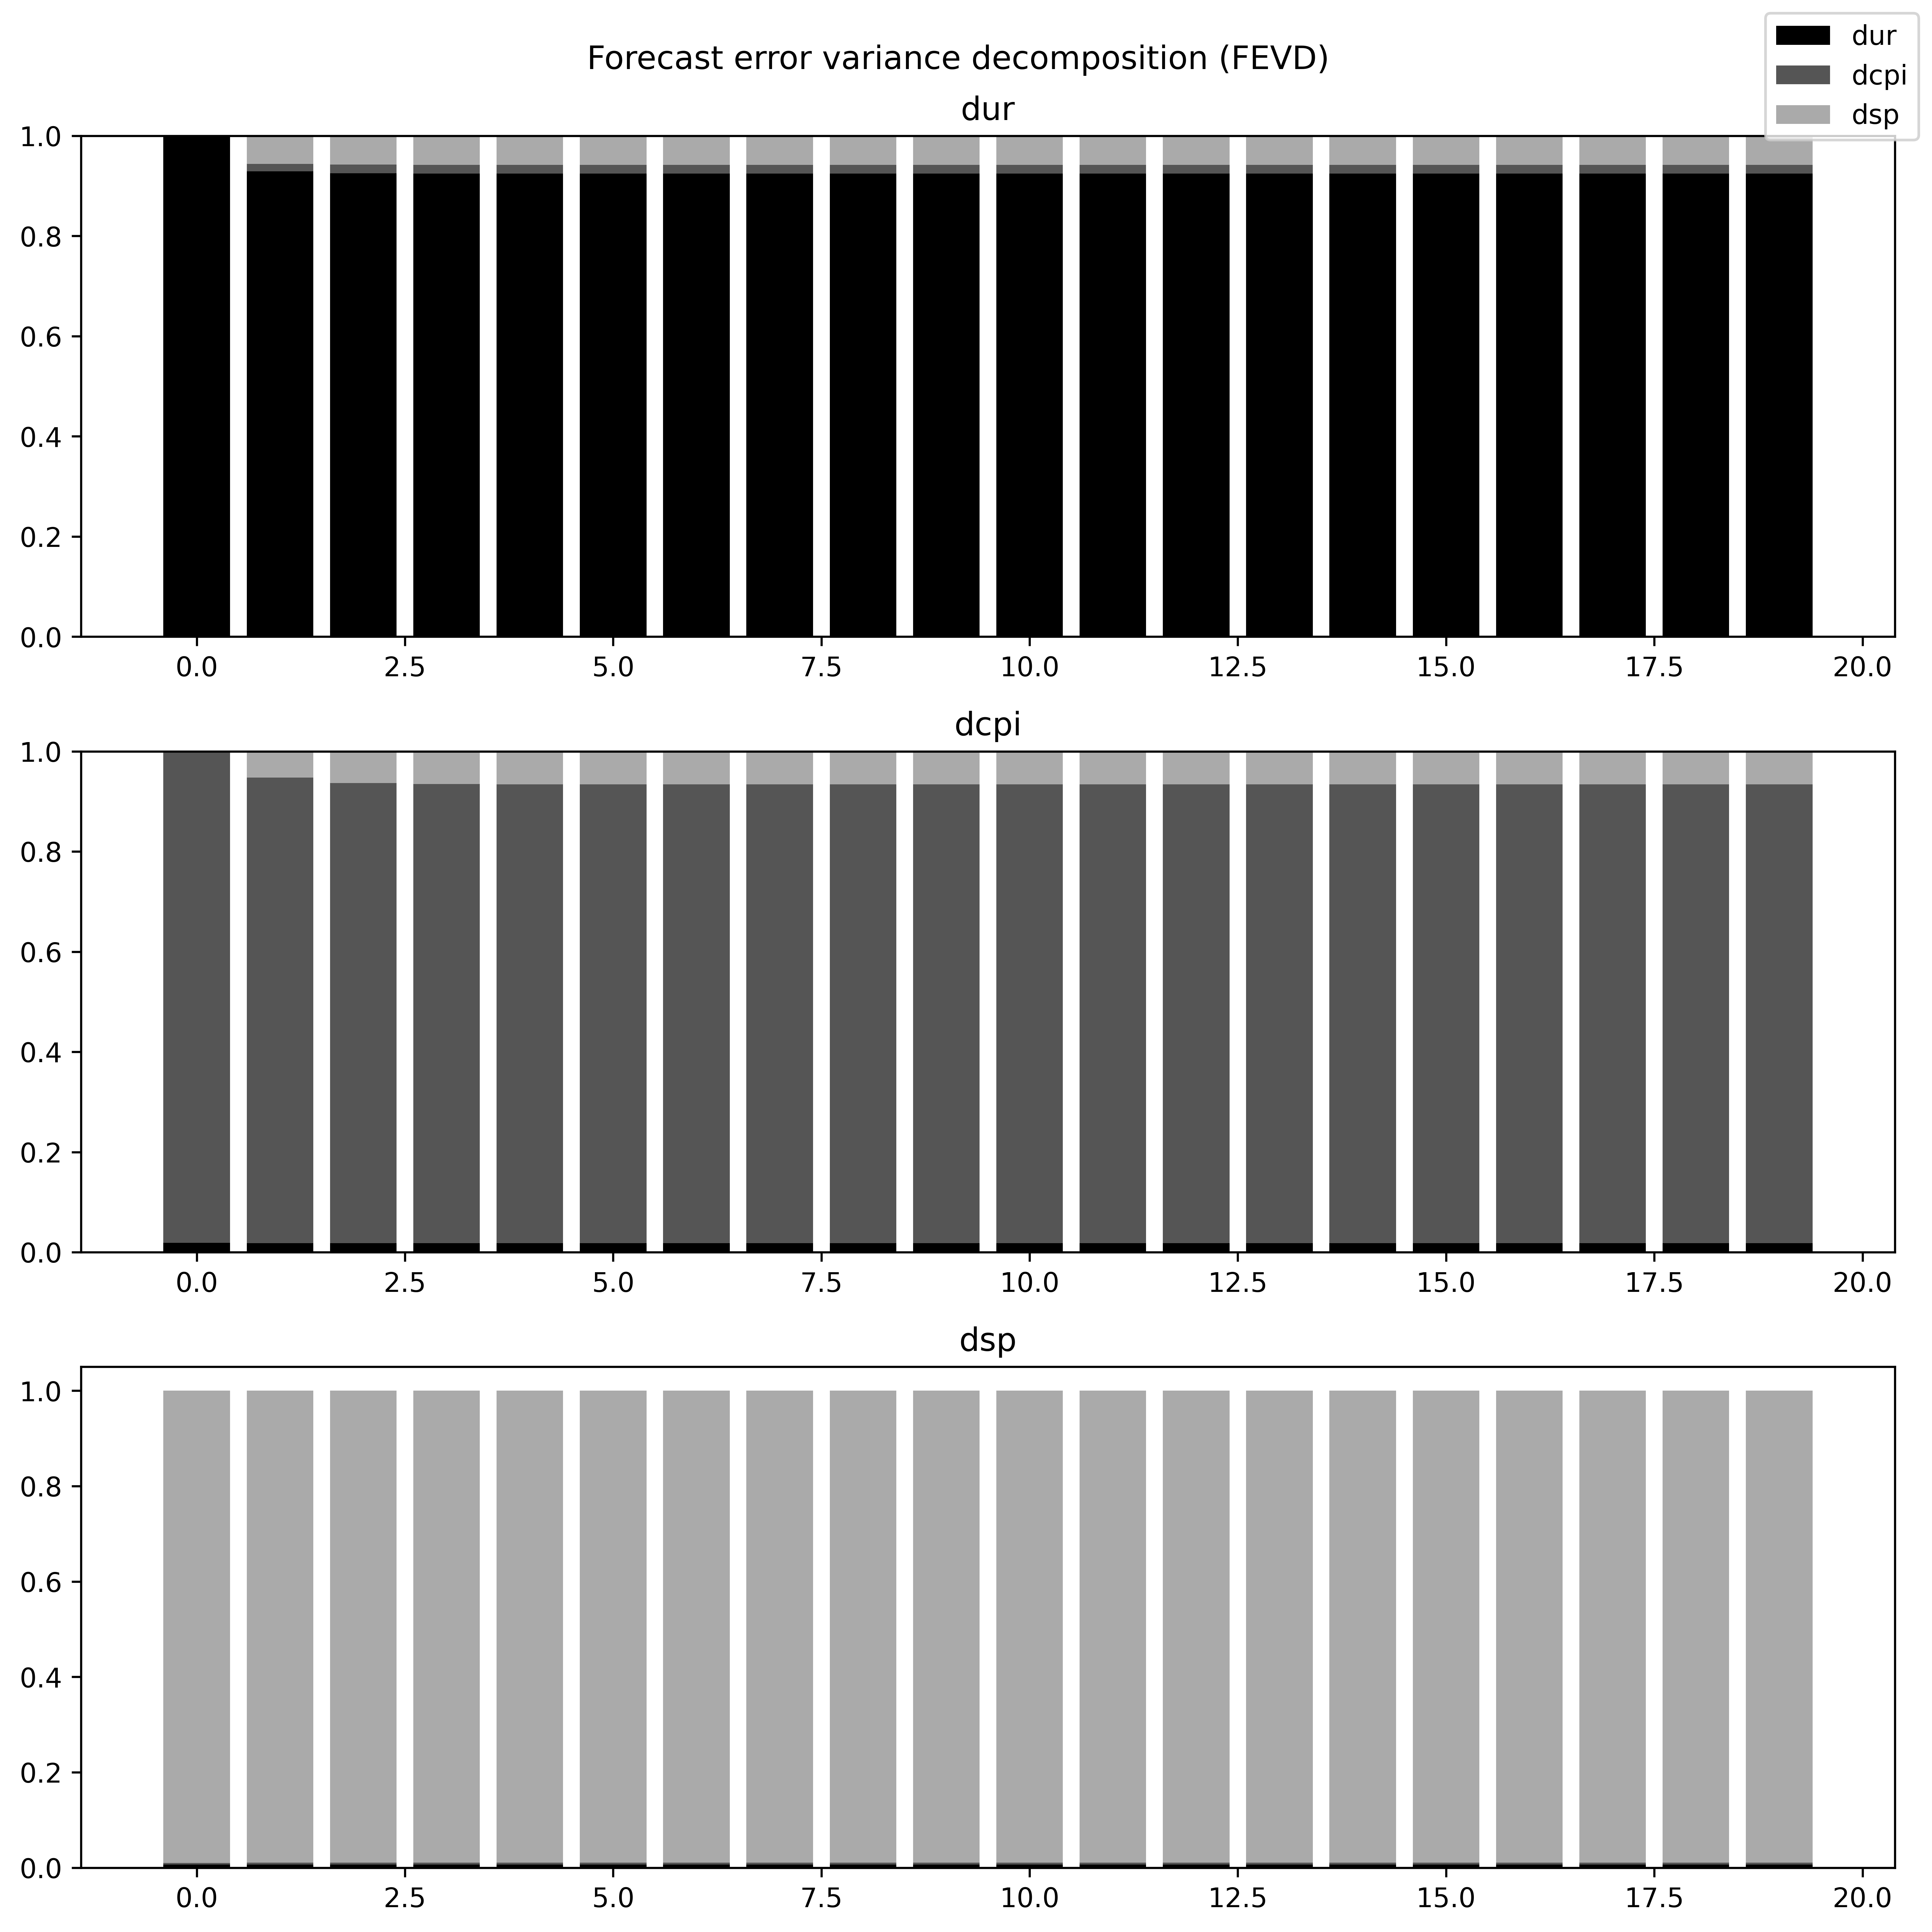

In [56]:
#Sensitivity Analysis: Reversing the ordering of variables
data_reordered = data_transformed[['dur', 'dcpi', 'dsp']] 
model_rev = VAR(data_reordered)
res_rev = model_rev.fit(maxlags=1)

fevd_rev = res_rev.fevd(20)
fig_fevd_rev = fevd_rev.plot()
fig_fevd_rev.set_dpi(600)
plt.tight_layout()
plt.show()

# Forecasting & Estimation

In [57]:
import statsmodels.formula.api as smf
from arch.unitroot import DFGLS
from statsmodels.tsa.stattools import coint

#Log-transform S&P500 and CPI
data['log_sp500'] = np.log(data['S&P500'])
data['log_cpi'] = np.log(data['CPI'])

#Run OLS regression: log_sp500 ~ log_cpi
model = smf.ols('log_sp500 ~ log_cpi', data=data).fit()
residuals = model.resid

#DF-GLS test on residuals
dfgls_test = DFGLS(residuals, max_lags=12)
dfgls_summary = dfgls_test.summary()


dfgls_summary

Test Statistic,-0.736
P-value,0.409
Lags,9


In [58]:
#Run OLS regression: log_sp500 ~ log_cpi
model = smf.ols('log_sp500 ~ UnemploymentRate', data=data).fit()
residuals = model.resid

#DF-GLS test on residuals
dfgls_test = DFGLS(residuals, max_lags=12)
dfgls_summary = dfgls_test.summary()


dfgls_summary

Test Statistic,0.150
P-value,0.743
Lags,2


In [59]:
#Run OLS regression: log_sp500 ~ log_cpi
model = smf.ols('log_cpi ~ UnemploymentRate', data=data).fit()
residuals = model.resid

#DF-GLS test on residuals
dfgls_test = DFGLS(residuals, max_lags=12)
dfgls_summary = dfgls_test.summary()


dfgls_summary

Test Statistic,2.652
P-value,0.997
Lags,0


In [60]:
#Run Engle-Granger cointegration test using statsmodels' built-in function
score, pvalue, _ = coint(data['log_sp500'], data['log_cpi'])

#Display test statistic and p-value
score, pvalue

(-2.6180224111447337, 0.22963231951725432)

In [61]:
#Run Engle-Granger cointegration test using statsmodels' built-in function
score, pvalue, _ = coint(data['log_sp500'], data['UnemploymentRate'])

#Display test statistic and p-value
score, pvalue

(-0.7105583237749941, 0.9454872438229664)

In [62]:
#Run Engle-Granger cointegration test using statsmodels' built-in function
score, pvalue, _ = coint(data['log_cpi'], data['UnemploymentRate'])

#Display test statistic and p-value
score, pvalue

(-0.6579054585046683, 0.9509926165304424)

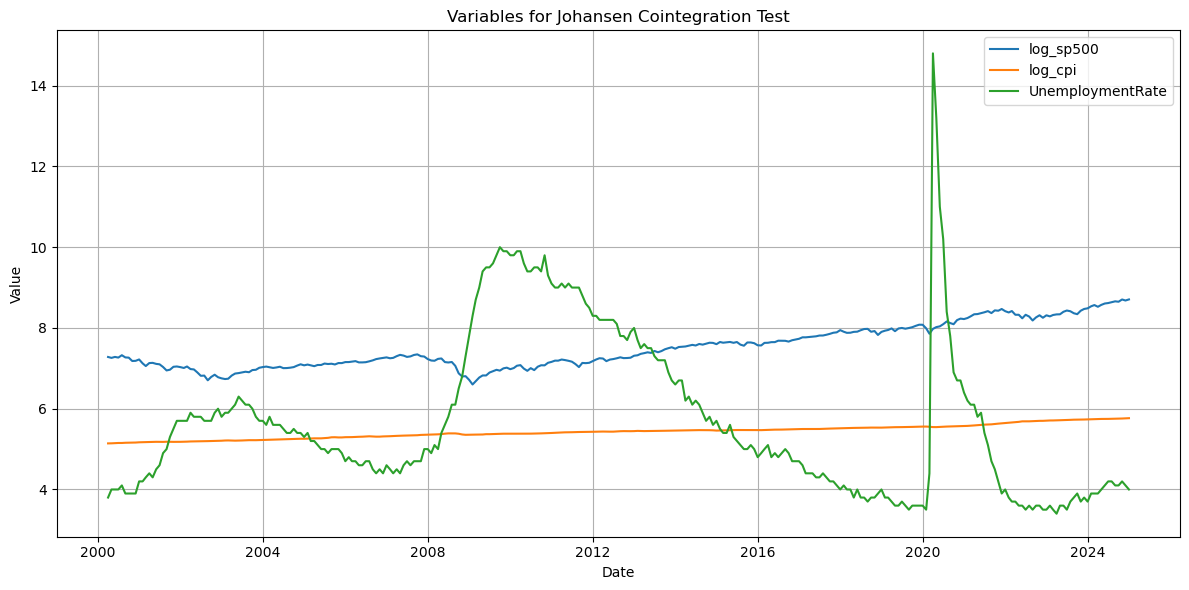

In [63]:
from statsmodels.tsa.vector_ar import vecm

#Keep log-transformed variables + raw UnemploymentRate
vecm_data = data[['log_sp500', 'log_cpi', 'UnemploymentRate']].dropna()
vecm_data.index.freq = 'MS'

#Re-run lag selection and Johansen cointegration test (trace method)
lag_selection_updated = vecm.select_order(vecm_data, maxlags=12)
johansen_trace_updated = vecm.select_coint_rank(
    vecm_data, det_order=1, k_ar_diff=lag_selection_updated.aic, method='trace', signif=0.05
)

#Plot all three series for visual inspection
plt.figure(figsize=(12, 6))
for col in vecm_data.columns:
    plt.plot(vecm_data[col], label=col)
plt.title("Variables for Johansen Cointegration Test")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




In [64]:
vec_rank1 = vecm.select_coint_rank(vecm_data,
    det_order=1,         
    k_ar_diff=1,         
    method='trace',
    signif=0.05
)
vec_rank1.summary()

r_0,r_1,test statistic,critical value
0,3,39.05,35.01
1,3,14.73,18.40


In [65]:
vecm_model = vecm.VECM(
    vecm_data,
    k_ar_diff=1,           # First lag of differences, per seminar setup
    coint_rank=1,          # From vecm_rank_test result
    deterministic='co'     # Constant within cointegration relation
)

vecm_results = vecm_model.fit()

# Display VECM estimation summary
vecm_results.summary()


,coef,std err,z,P>|z|,[0.025,0.975]
const,0.0755,0.053,1.417,0.157,-0.029,0.180
L1.log_sp500,0.0055,0.061,0.090,0.928,-0.113,0.124
L1.log_cpi,-0.4531,0.864,-0.524,0.600,-2.147,1.240
L1.UnemploymentRate,8.894e-05,0.004,0.022,0.982,-0.008,0.008
,coef,std err,z,P>|z|,[0.025,0.975]
const,0.0069,0.003,2.210,0.027,0.001,0.013
L1.log_sp500,0.0135,0.004,3.815,0.000,0.007,0.020
L1.log_cpi,0.4652,0.051,9.208,0.000,0.366,0.564
L1.UnemploymentRate,-0.0002,0.000,-0.710,0.477,-0.001,0.000
,coef,std err,z,P>|z|,[0.025,0.975]


In [67]:
# Export to Excel
data.to_excel('Econometrics_Data.xlsx', index=False)